In [9]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
#状态
# {"foo":1}
class State(TypedDict):
    foo:int
# 创建代理-Agent
def agent_01(state):
    new_state={"foo":state["foo"]+1}
    return new_state
# 定义循环条件
def cond_edge(state):
    if state["foo"]<3:
        return "node_01"
    else:
        return END
# 构建图
_buider=StateGraph(State)

# 创建节点
_buider.add_node("node_01",agent_01)

# 创建边(普通边)
_buider.add_edge(START,"node_01")
# 条件边
_buider.add_conditional_edges("node_01",cond_edge,["node_01",END])

# 编译图,即生成图
_graph=_buider.compile()

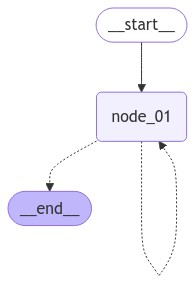

In [10]:
from IPython.display import display,Image

display(Image(_graph.get_graph().draw_mermaid_png()))

In [4]:
_graph.invoke({"foo":0})

{'foo': 3}